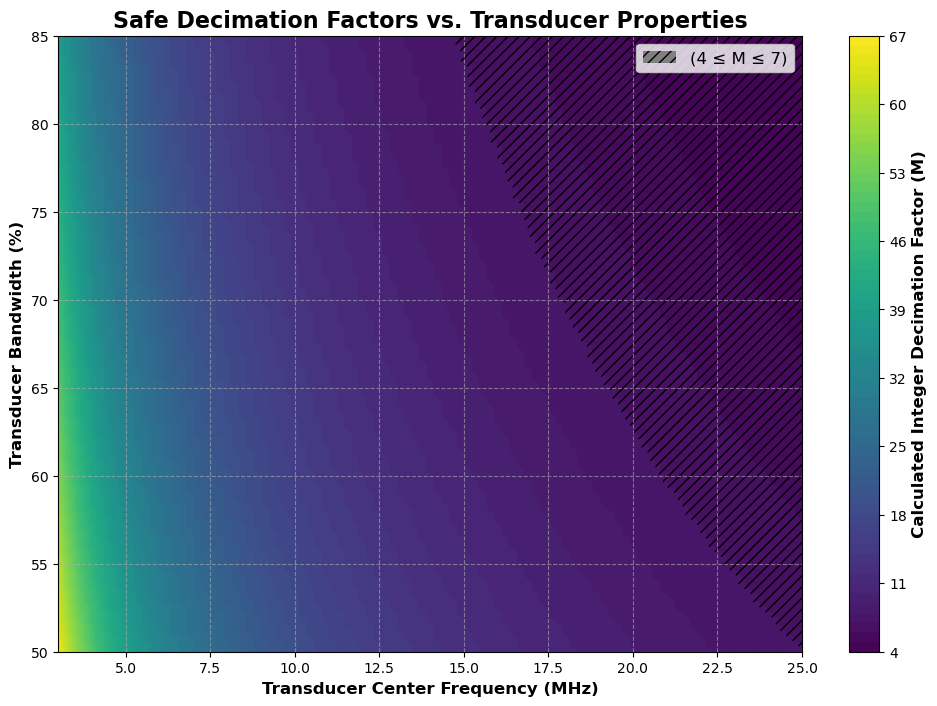

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- system parameters ---
fs_adc = 125e6  # ADC sampling rate of AFE in Hz (125 MSPS)
practical_margin = 2.5  # practical margin for Nyquist rate (instead of 2)

# --- transducer parameter ranges ---
# x-axis: center frequency fc of transducer (3 MHz, 25 MHz) in Hz
fc_range = np.linspace(3e6, 25e6, 100) 

# y-axis: 6dB bandwidth bw from 50% to 85% in percent
bw_percent_range = np.linspace(50, 85, 100)

# --- 2D grid for calculations ---
fc_grid, bw_percent_grid = np.meshgrid(fc_range, bw_percent_range)

# calculate absolute bandwidth in Hz for each point on the grid
bw_abs_grid = fc_grid * (bw_percent_grid / 100.0)

# after down-conversion, the highest frequency component is half the bandwidth
f_baseband_max_grid = bw_abs_grid / 2.0

# calculate the required output sample rate with the practical margin
fs_out_grid = practical_margin * f_baseband_max_grid

# calculate the maximum possible decimation factor
# np.floor to only consider integer decimation factors
M_grid = np.floor(fs_adc / fs_out_grid)


# --- visualization ---
# create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# create a contour plot to show the decimation factor across the range
# use discrete levels to make it easier to read integer decimation factors
levels = np.arange(M_grid.min(), M_grid.max() + 2)
contour = ax.contourf(fc_grid / 1e6, bw_percent_grid, M_grid, levels=levels, cmap='viridis')

# add a color bar to show the mapping of colors to decimation factors
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Calculated Integer Decimation Factor (M)', fontsize=12, weight='bold')

# --- highlight the target region (4 <= M <= 7) ---

# create a boolean mask where the condition is true
highlight_mask = (M_grid >= 4) & (M_grid <= 7)

# use another contour plot to overlay the highlighted region
ax.contourf(fc_grid / 1e6, bw_percent_grid, highlight_mask, levels=[0.5, 1.5],
            colors='none', hatches=['///'],
            )

# create a custom legend patch for the highlighted area
highlight_patch = mpatches.Patch(facecolor='gray', hatch='///', label='(4 ≤ M ≤ 7)')
ax.legend(handles=[highlight_patch], loc='upper right', fontsize=12)


# --- labels and title ---
ax.set_title('Safe Decimation Factors vs. Transducer Properties', fontsize=16, weight='bold')
ax.set_xlabel('Transducer Center Frequency (MHz)', fontsize=12, weight='bold')
ax.set_ylabel('Transducer Bandwidth (%)', fontsize=12, weight='bold')

# set grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

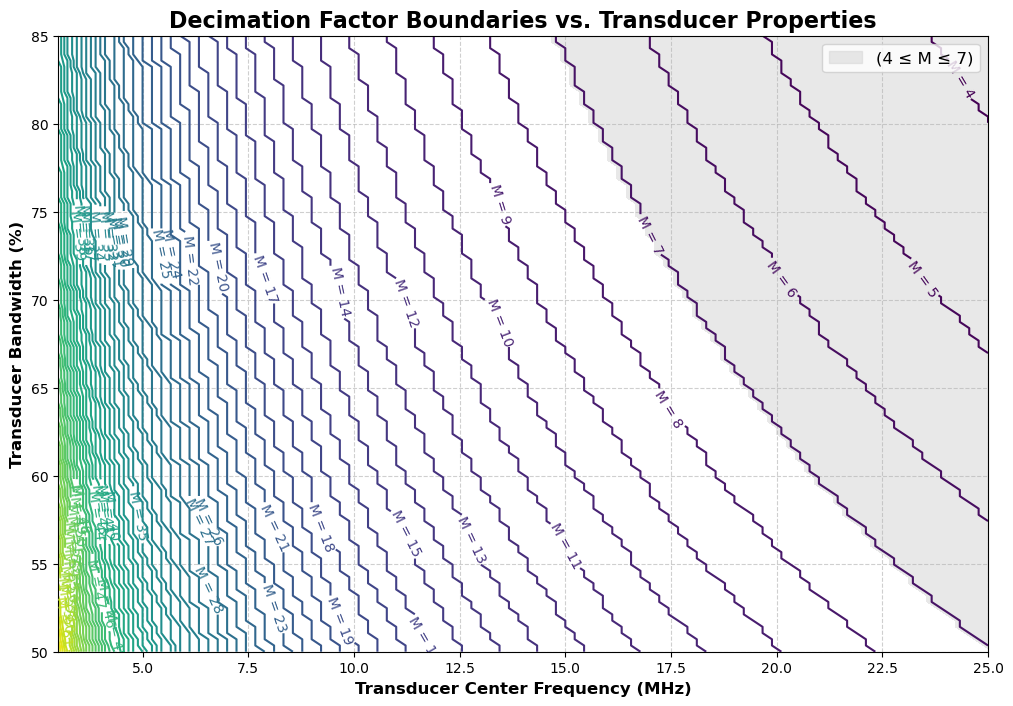

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- system parameters ---
fs_adc = 125e6  # AFE's ADC sampling rate in Hz (125 MSPS)
practical_margin = 2.5  # Practical margin for Nyquist (e.g., 2.5x the highest frequency)

# --- transducer parameter ranges ---
# x-axis: center frequency fc of transducer (3 MHz, 25 MHz) in Hz
fc_range = np.linspace(3e6, 25e6, 100)  

# y-axis: 6dB bandwidth bw from 50% to 85% in percent
bw_percent_range = np.linspace(50, 85, 100)

# --- 2D grid for calculations ---
fc_grid, bw_percent_grid = np.meshgrid(fc_range, bw_percent_range)

# calculate the absolute bandwidth in Hz for each point on the grid
bw_abs_grid = fc_grid * (bw_percent_grid / 100.0)

# after down-conversion, the highest frequency component is half the bandwidth
f_baseband_max_grid = bw_abs_grid / 2.0

# calculate the required output sample rate with the practical margin
fs_out_grid = practical_margin * f_baseband_max_grid

# calculate the maximum possible decimation factor
# np.floor to only consider integer decimation factors
M_grid = np.floor(fs_adc / fs_out_grid)


# --- visualization ---
# create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# --- highlight the target region (4 <= M <= 7)  ---
# create mask where the condition is true
highlight_mask = (M_grid >= 4) & (M_grid <= 7)
ax.contourf(fc_grid / 1e6, bw_percent_grid, highlight_mask, levels=[0.5, 1.5],
            colors=['lightgray'], alpha=0.5)

# --- draw the contour lines (altitude lines) ---
# Define the specific integer levels for the lines
levels = np.arange(int(M_grid.min()), int(M_grid.max()) + 2)
contour_lines = ax.contour(fc_grid / 1e6, bw_percent_grid, M_grid, levels=levels, cmap='viridis')
ax.clabel(contour_lines, inline=True, fontsize=10, fmt='M = %d')


# --- create legend ---
highlight_patch = mpatches.Patch(color='lightgray', alpha=0.5, label='(4 ≤ M ≤ 7)')
ax.legend(handles=[highlight_patch], loc='upper right', fontsize=12)


# --- labels and title ---
ax.set_title('Decimation Factor Boundaries vs. Transducer Properties', fontsize=16, weight='bold')
ax.set_xlabel('Transducer Center Frequency (MHz)', fontsize=12, weight='bold')
ax.set_ylabel('Transducer Bandwidth (%)', fontsize=12, weight='bold')

# grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()